In [47]:
import json
import os
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the COCO JSON file
json_file_path = os.path.expanduser('~/Downloads/archive/train/_annotations.coco.json')
with open(json_file_path) as f:
    coco_data = json.load(f)

# Print the top-level keys of the JSON file
print(coco_data.keys())

# Check how many images and annotations are in the dataset
num_images = len(coco_data['images'])
num_annotations = len(coco_data['annotations'])
num_categories = len(coco_data['categories'])
print(f"Number of images: {num_images}")
print(f"Number of annotations: {num_annotations}")
print(f"Number of categories: {num_categories}")
print(coco_data['categories'])

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
Number of images: 1502
Number of annotations: 1502
Number of categories: 3
[{'id': 0, 'name': 'Tumor', 'supercategory': 'none'}, {'id': 1, 'name': '0', 'supercategory': 'Tumor'}, {'id': 2, 'name': '1', 'supercategory': 'Tumor'}]


In [48]:
print(coco_data["annotations"][0:5])

[{'id': 0, 'image_id': 0, 'category_id': 1, 'bbox': [145, 239, 168.75, 162.5], 'area': 27421.875, 'segmentation': [[313.75, 238.75, 145, 238.75, 145, 401.25, 313.75, 401.25, 313.75, 238.75]], 'iscrowd': 0}, {'id': 1, 'image_id': 1, 'category_id': 1, 'bbox': [194, 176, 148.75, 233.75], 'area': 34770.313, 'segmentation': [[342.5, 176.25, 193.75, 176.25, 193.75, 410, 342.5, 410, 342.5, 176.25]], 'iscrowd': 0}, {'id': 2, 'image_id': 2, 'category_id': 1, 'bbox': [133, 173, 162.5, 185], 'area': 30062.5, 'segmentation': [[295, 172.5, 132.5, 172.5, 132.5, 357.5, 295, 357.5, 295, 172.5]], 'iscrowd': 0}, {'id': 3, 'image_id': 3, 'category_id': 1, 'bbox': [245, 358, 138.75, 166.25], 'area': 23067.188, 'segmentation': [[383.75, 357.5, 245, 357.5, 245, 523.75, 383.75, 523.75, 383.75, 357.5]], 'iscrowd': 0}, {'id': 4, 'image_id': 4, 'category_id': 1, 'bbox': [80, 189, 112.5, 132.5], 'area': 14906.25, 'segmentation': [[192.5, 188.75, 80, 188.75, 80, 321.25, 192.5, 321.25, 192.5, 188.75]], 'iscrowd': 

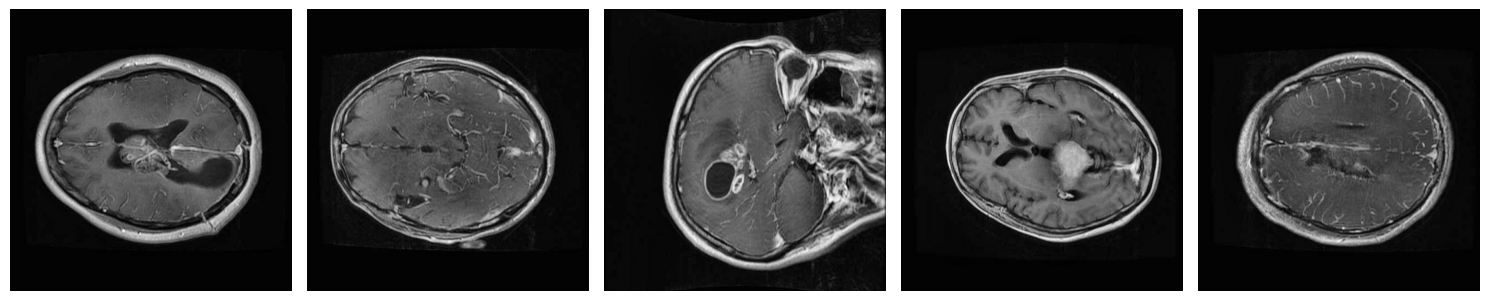

In [49]:
# Define the directory containing images
image_dir = os.path.expanduser('~/Downloads/archive/train')

# List all JPEG files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Number of images to display
num_images_to_display = 5

# Create a figure with subplots
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

# Display the top few images
for i in range(min(num_images_to_display, len(image_files))):
    img_path = os.path.join(image_dir, image_files[i])
    # Read the image in grayscale mode
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Plot the image
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')  # Hide the axis

# Adjust layout
plt.tight_layout()
plt.show()

Loading image from: /Users/drsoumya1702/Downloads/archive/train/2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg


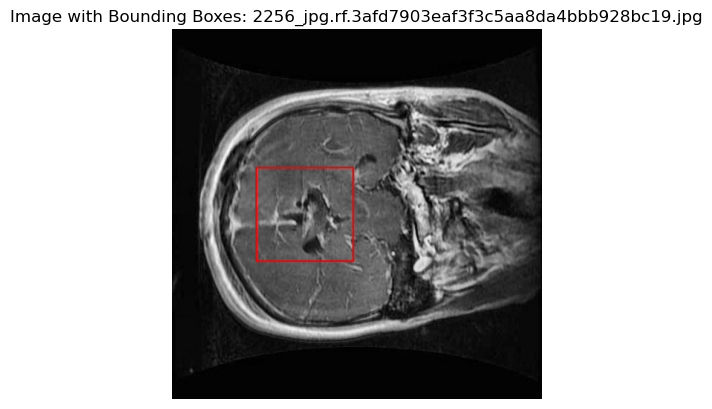

Loading image from: /Users/drsoumya1702/Downloads/archive/train/2871_jpg.rf.3b6eadfbb369abc2b3bcb52b406b74f2.jpg


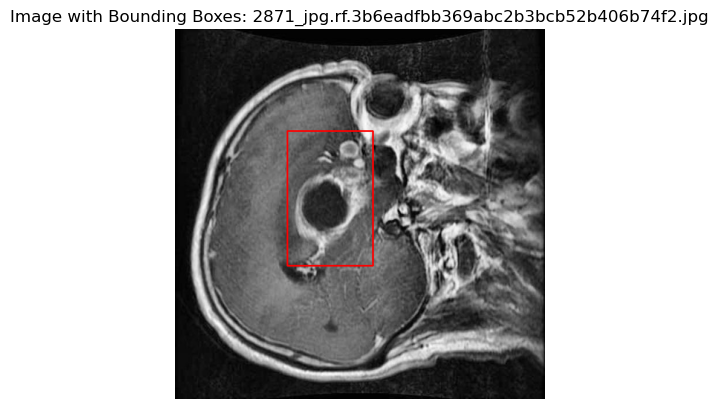

Loading image from: /Users/drsoumya1702/Downloads/archive/train/2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg


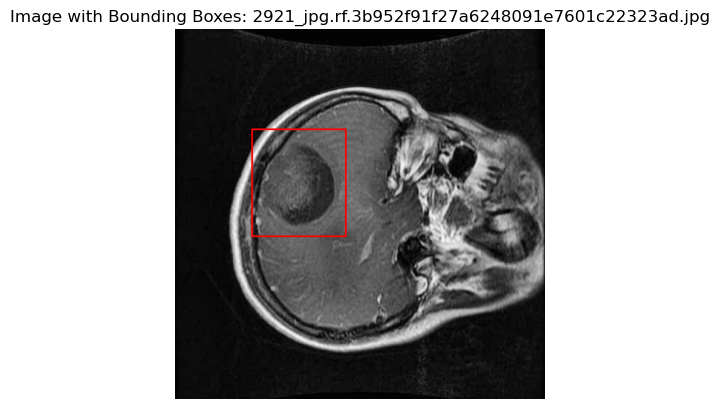

Loading image from: /Users/drsoumya1702/Downloads/archive/train/2777_jpg.rf.3b60ea7f7e70552e70e41528052018bd.jpg


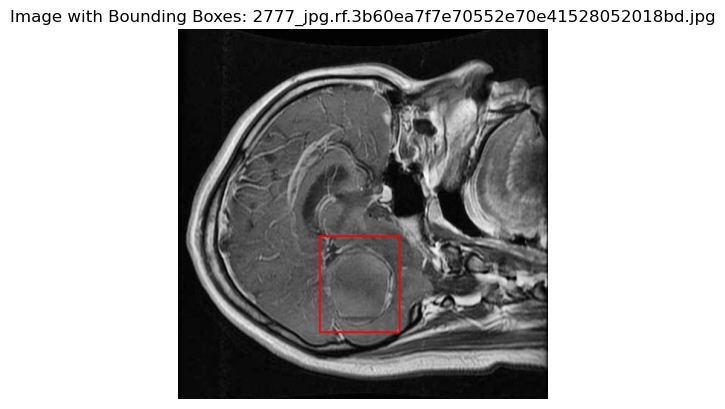

Loading image from: /Users/drsoumya1702/Downloads/archive/train/2860_jpg.rf.3bb87fa4f938af5abfb1e17676ec1dad.jpg


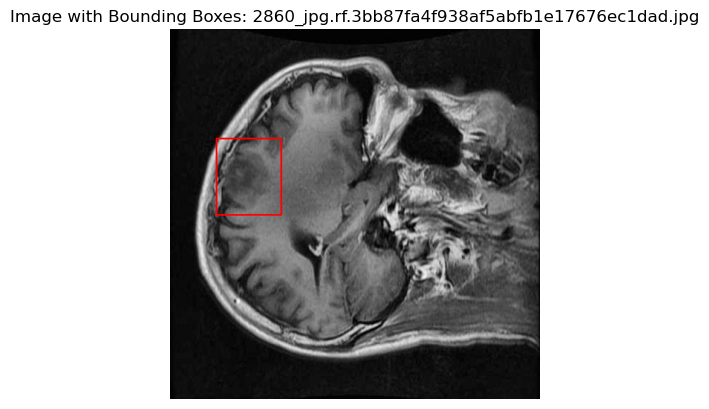

In [50]:
def visualize_image_with_bbox(img_dir, coco_data, idx):
    # Get image info
    img_info = coco_data['images'][idx]
    img_path = os.path.join(img_dir, img_info['file_name'])
    
    print(f"Loading image from: {img_path}")
    
    # Load image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    
    if img is None:
        print(f"Error: Image at {img_path} not found or cannot be loaded.")
        return
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting
    
    # Load corresponding annotation (bounding boxes)
    ann_list = [ann for ann in coco_data['annotations'] if ann['image_id'] == img_info['id']]
    
    for ann in ann_list:
        bbox = ann['bbox']
        x, y, w, h = bbox
        # Draw rectangle (bounding box) on image
        img = cv2.rectangle(img, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)
    
    # Show the image with bounding boxes
    plt.imshow(img)
    plt.title(f"Image with Bounding Boxes: {img_info['file_name']}")
    plt.axis('off')
    plt.show()

# Example usage: visualize the first 5 images with bounding boxes
for idx in range(5):
    visualize_image_with_bbox(img_dir, coco_data, idx)


Loading image from: /Users/drsoumya1702/Downloads/archive/train/2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg


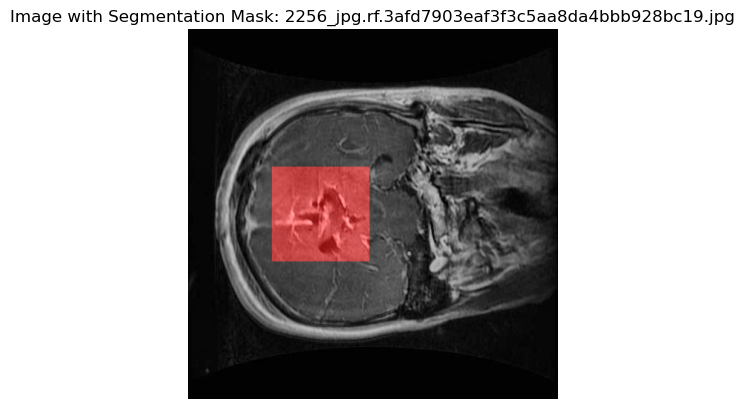

Loading image from: /Users/drsoumya1702/Downloads/archive/train/2871_jpg.rf.3b6eadfbb369abc2b3bcb52b406b74f2.jpg


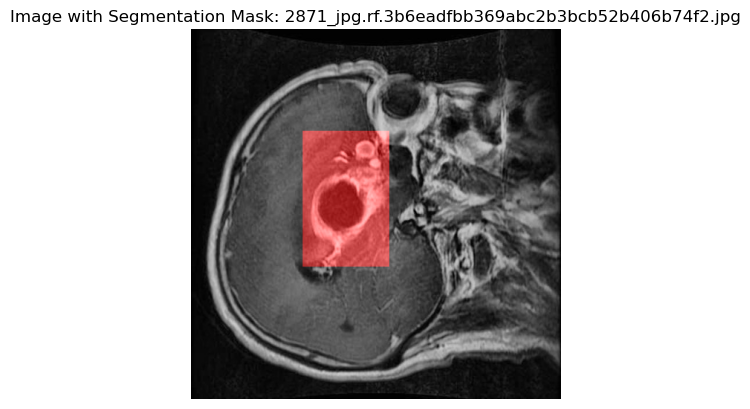

Loading image from: /Users/drsoumya1702/Downloads/archive/train/2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg


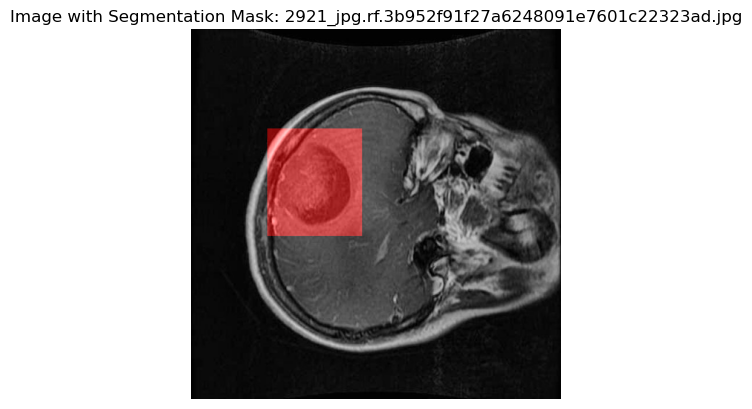

Loading image from: /Users/drsoumya1702/Downloads/archive/train/2777_jpg.rf.3b60ea7f7e70552e70e41528052018bd.jpg


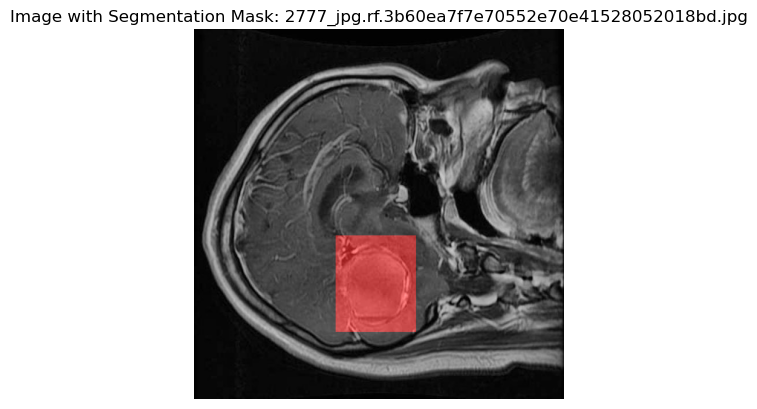

Loading image from: /Users/drsoumya1702/Downloads/archive/train/2860_jpg.rf.3bb87fa4f938af5abfb1e17676ec1dad.jpg


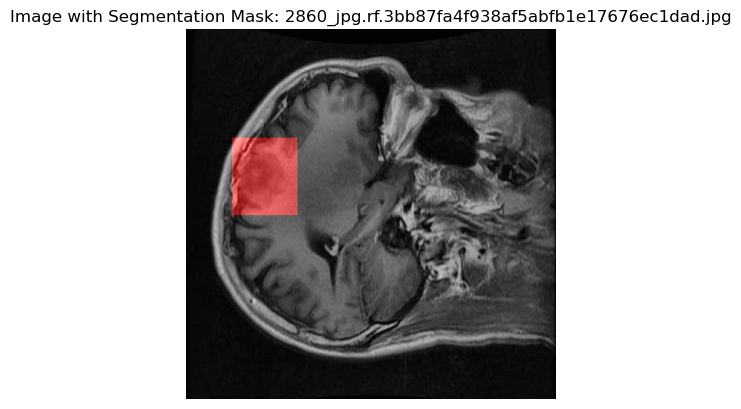

In [51]:
def visualize_image_with_mask(img_dir, coco_data, idx):
    # Get image info
    img_info = coco_data['images'][idx]
    img_path = os.path.join(img_dir, img_info['file_name'])

    print(f"Loading image from: {img_path}")
    
    # Load image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"Error: Image at {img_path} not found or cannot be loaded.")
        return
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting
    
    # Load corresponding mask (annotation)
    ann = next((ann for ann in coco_data['annotations'] if ann['image_id'] == img_info['id']), None)
    if ann is None:
        print(f"Error: Annotation for image {img_info['file_name']} not found.")
        return
    
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

    # Assuming the 'segmentation' field is polygon-based
    if 'segmentation' in ann:
        segmentation = ann['segmentation']
        for segment in segmentation:
            pts = np.array(segment).reshape(-1, 2)
            cv2.fillPoly(mask, [pts.astype(np.int32)], 1)

    # Overlay mask on the image (use alpha blending)
    mask_colored = np.zeros_like(img)
    mask_colored[mask == 1] = [255, 0, 0]  # Red mask
    overlay_img = cv2.addWeighted(img, 0.8, mask_colored, 0.5, 0)

    # Visualize the image and mask overlay
    plt.imshow(overlay_img)
    plt.title(f"Image with Segmentation Mask: {img_info['file_name']}")
    plt.axis('off')
    plt.show()

# Example usage: visualize the first 5 images with segmentation masks
for idx in range(5):
    visualize_image_with_mask(img_dir, coco_data, idx)


In [52]:
# Count how many annotations each class has
class_counts = defaultdict(int)
for ann in coco_data['annotations']:
    class_counts[ann['category_id']] += 1

# Print class distribution
for category in coco_data['categories']:
    category_id = category['id']
    category_name = category['name']
    print(f"Class '{category_name}' (ID: {category_id}) has {class_counts[category_id]} annotations")


Class 'Tumor' (ID: 0) has 0 annotations
Class '0' (ID: 1) has 771 annotations
Class '1' (ID: 2) has 731 annotations


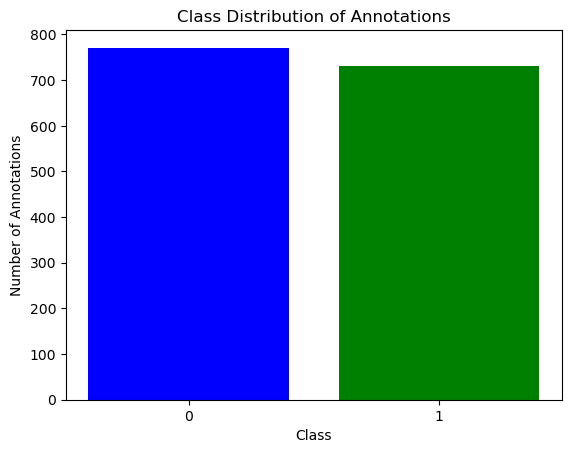

In [53]:
# Visualize the class distribution
category_ids = [ann['category_id'] for ann in coco_data['annotations']]
categories = {cat['id']: cat['name'] for cat in coco_data['categories']}

# Count occurrences of each category
class_counts = defaultdict(int)
for ann in coco_data['annotations']:
    class_counts[ann['category_id']] += 1

# Plot the class distribution
category_names = [categories[key] for key in class_counts.keys()]
counts = list(class_counts.values())

plt.bar(category_names, counts, color=['blue', 'green', 'orange'])
plt.title('Class Distribution of Annotations')
plt.xlabel('Class')
plt.ylabel('Number of Annotations')
plt.show()

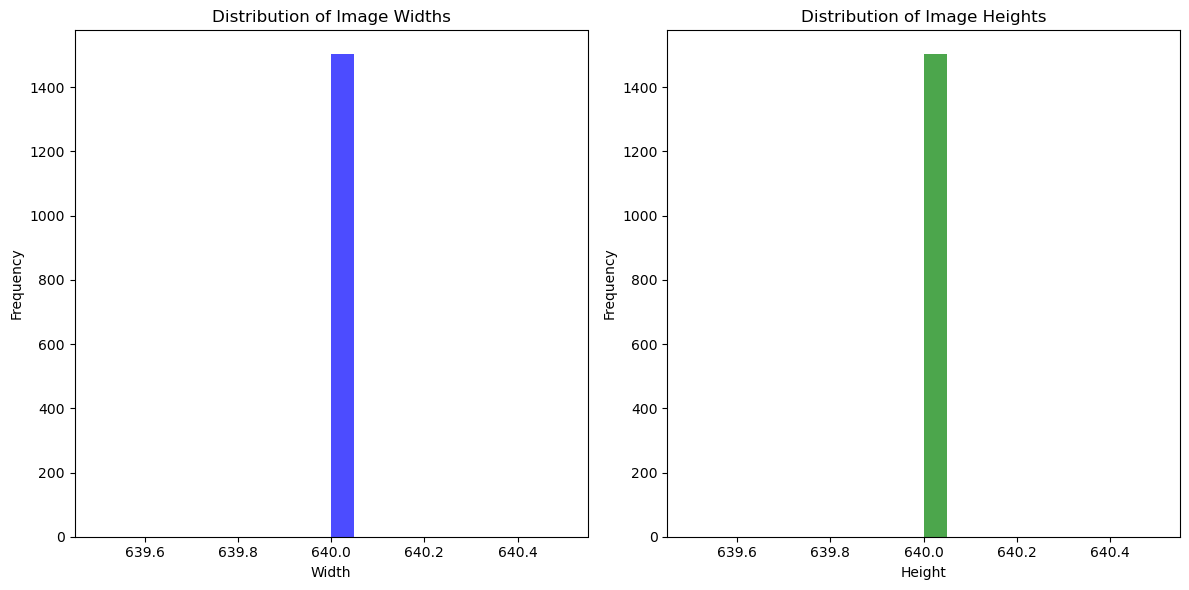

In [54]:
# Get image dimensions (width, height)
image_sizes = [(img['width'], img['height']) for img in coco_data['images']]

# Plot the distribution of widths and heights
widths, heights = zip(*image_sizes)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

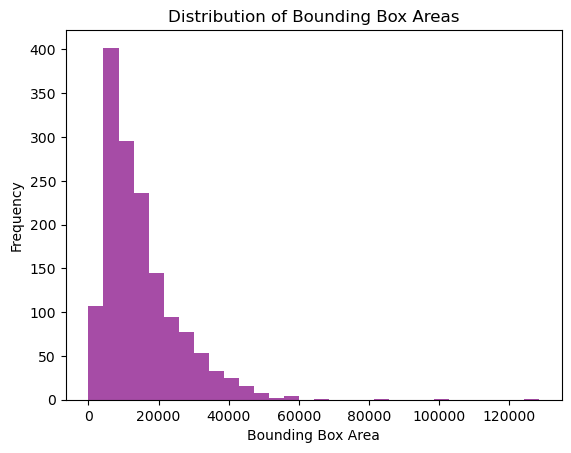

In [55]:
# Calculate bounding box sizes
bbox_areas = [(ann['bbox'][2] * ann['bbox'][3]) for ann in coco_data['annotations']]  # width * height

# Plot the distribution of bounding box sizes
plt.hist(bbox_areas, bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Bounding Box Areas')
plt.xlabel('Bounding Box Area')
plt.ylabel('Frequency')
plt.show()

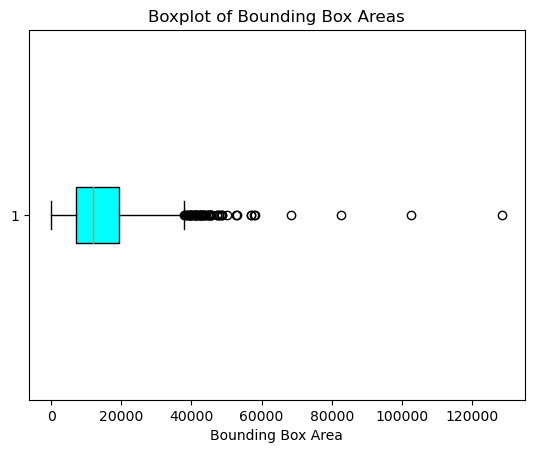

In [56]:
# Bounding box area distribution (visualizing as a boxplot to check for outliers)
plt.boxplot(bbox_areas, vert=False, patch_artist=True, boxprops=dict(facecolor='cyan'))
plt.title('Boxplot of Bounding Box Areas')
plt.xlabel('Bounding Box Area')
plt.show()

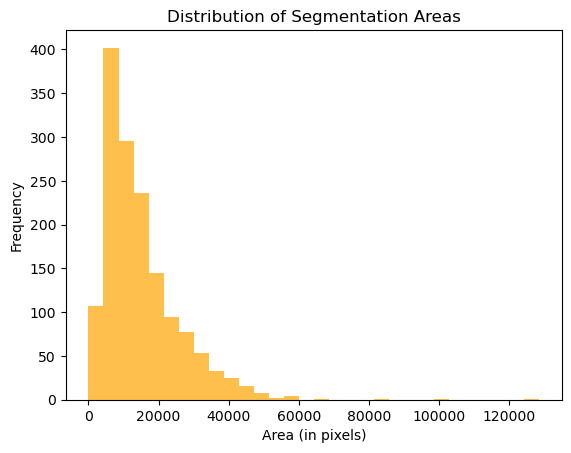

In [57]:
# Calculate mask areas
mask_areas = [ann['area'] for ann in coco_data['annotations']]

# Plot the distribution of mask areas
plt.hist(mask_areas, bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Segmentation Areas')
plt.xlabel('Area (in pixels)')
plt.ylabel('Frequency')
plt.show()